In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from typing import TypedDict, Literal, Annotated, List
from operator import add
from langchain_core.messages import HumanMessage, SystemMessage, BaseMessage
from langgraph.graph import END, START, StateGraph
from langgraph.prebuilt import ToolNode
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool


class InputState(TypedDict):
    article: str


class OutputState(TypedDict):
    agent_output: str


class OverallState(InputState, OutputState):
    messages: Annotated[List[BaseMessage], add]


@tool
def get_current_club(player_name: str):
    """Gets current club of a player"""
    fake_db = {
        "Lionel Messi": "Paris Saint-Germain",
        "Cristiano Ronaldo": "Al Nassr FC",
    }
    return fake_db.get(player_name, "Current club information not available.")


tools1 = [get_current_club]
model1 = ChatOpenAI(model="gpt-4o-mini").bind_tools(tools1)


def call_model_current_club(state: OverallState):
    local_messages = state.get("messages", [])
    if not local_messages:
        human_message = HumanMessage(content=state["article"])
        local_messages.append(human_message)
    system_message = SystemMessage(
        content="""You are an agent tasked with determining the current club of a player.
If the current club is mentioned, return it. Otherwise, return 'Current club information not available.'"""
    )
    response = model1.invoke([system_message] + local_messages)
    state["agent_output"] = response.content
    state["messages"] = local_messages + [response]
    return state


def should_continue(state: OverallState) -> Literal["tools", END]:
    last_message = state["messages"][-1]
    if getattr(last_message, "tool_calls", None):
        return "tools"
    return END


current_club_graph = StateGraph(OverallState, input=InputState, output=OutputState)
current_club_graph.add_node("call_model_current_club", call_model_current_club)
current_club_graph.add_node("tools", ToolNode(tools1))
current_club_graph.add_edge(START, "call_model_current_club")
current_club_graph.add_conditional_edges("call_model_current_club", should_continue)
current_club_graph.add_edge("tools", "call_model_current_club")

current_club_researcher_agent = current_club_graph.compile()

C:\Users\owner\AppData\Local\Temp\ipykernel_11920\3405544266.py:58: LangGraphDeprecatedSinceV05: `input` is deprecated and will be removed. Please use `input_schema` instead. Deprecated in LangGraph V0.5 to be removed in V2.0.
  current_club_graph = StateGraph(OverallState, input=InputState, output=OutputState)
C:\Users\owner\AppData\Local\Temp\ipykernel_11920\3405544266.py:58: LangGraphDeprecatedSinceV05: `output` is deprecated and will be removed. Please use `output_schema` instead. Deprecated in LangGraph V0.5 to be removed in V2.0.
  current_club_graph = StateGraph(OverallState, input=InputState, output=OutputState)


In [3]:
initial_state = {
    "article": "Lionel Messi will join Real Madrid 2025",
}
current_club_researcher_agent.invoke(initial_state)

{'agent_output': 'Current club information not available.'}

In [4]:
initial_state = {
    "article": "Thomas Müller will join Real Madrid 2025",
}
current_club_researcher_agent.invoke(initial_state)

{'agent_output': 'Current club information not available.'}

In [5]:
class InputState(TypedDict):
    article: str


class OutputState(TypedDict):
    agent_output: str


class OverallState(InputState, OutputState):
    messages: Annotated[List[BaseMessage], add]


@tool
def get_market_value(player_name: str):
    """Gets current market value of a player"""
    fake_market_value_db = {
        "Lionel Messi": "€50 million",
        "Cristiano Ronaldo": "€30 million",
    }
    return fake_market_value_db.get(
        player_name, "Market value information not available."
    )


tools2 = [get_market_value]
model2 = ChatOpenAI(model="gpt-4o-mini").bind_tools(tools2)


def call_model_market_value(state: OverallState):
    local_messages = state.get("messages", [])
    if not local_messages:
        human_message = HumanMessage(content=state["article"])
        local_messages.append(human_message)
    system_message = SystemMessage(
        content="""You are an agent tasked with determining the market value of a player.
If the market value is mentioned, return it. Otherwise, return 'Market value information not available.'"""
    )
    response = model2.invoke([system_message] + local_messages)
    state["agent_output"] = response.content
    state["messages"] = local_messages + [response]
    return state


def should_continue(state: OverallState) -> Literal["tools", END]:
    last_message = state["messages"][-1]
    if getattr(last_message, "tool_calls", None):
        return "tools"
    return END


market_value_graph = StateGraph(OverallState, input=InputState, output=OutputState)
market_value_graph.add_node("call_model_market_value", call_model_market_value)
market_value_graph.add_node("tools", ToolNode(tools2))
market_value_graph.add_edge(START, "call_model_market_value")
market_value_graph.add_conditional_edges("call_model_market_value", should_continue)
market_value_graph.add_edge("tools", "call_model_market_value")

market_value_researcher_agent = market_value_graph.compile()

C:\Users\owner\AppData\Local\Temp\ipykernel_11920\1740862040.py:51: LangGraphDeprecatedSinceV05: `input` is deprecated and will be removed. Please use `input_schema` instead. Deprecated in LangGraph V0.5 to be removed in V2.0.
  market_value_graph = StateGraph(OverallState, input=InputState, output=OutputState)
C:\Users\owner\AppData\Local\Temp\ipykernel_11920\1740862040.py:51: LangGraphDeprecatedSinceV05: `output` is deprecated and will be removed. Please use `output_schema` instead. Deprecated in LangGraph V0.5 to be removed in V2.0.
  market_value_graph = StateGraph(OverallState, input=InputState, output=OutputState)


In [6]:
market_value_researcher_agent.invoke(
    {"article": "Lionel Messi will switch from FC Barcelona to Real Madrid in 2025"}
)

{'agent_output': 'The market value of Lionel Messi is €50 million.'}

In [7]:
market_value_researcher_agent.invoke(
    {"article": "Thomas Müller will join Real Madrid 2025"}
)

{'agent_output': 'Market value information not available.'}

In [8]:
class InputState(TypedDict):
    article: str


class OutputState(TypedDict):
    agent_output: str


class OverallState(InputState, OutputState):
    pass


model_text_writer = ChatOpenAI(model="gpt-4o-mini")


def expand_text_to_100_words(state: OverallState):
    human_message = HumanMessage(content=state["article"])
    system_message = SystemMessage(
        content="Expand the following text to be at least 100 words. Maintain the original meaning while adding detail."
    )
    response = model_text_writer.invoke([system_message, human_message])
    state["agent_output"] = response.content
    return state


text_writer_graph = StateGraph(OverallState, input=InputState, output=OutputState)
text_writer_graph.add_node("expand_text_to_100_words", expand_text_to_100_words)
text_writer_graph.add_edge(START, "expand_text_to_100_words")
text_writer_graph.add_edge("expand_text_to_100_words", END)

text_writer_agent = text_writer_graph.compile()

C:\Users\owner\AppData\Local\Temp\ipykernel_11920\560055898.py:26: LangGraphDeprecatedSinceV05: `input` is deprecated and will be removed. Please use `input_schema` instead. Deprecated in LangGraph V0.5 to be removed in V2.0.
  text_writer_graph = StateGraph(OverallState, input=InputState, output=OutputState)
C:\Users\owner\AppData\Local\Temp\ipykernel_11920\560055898.py:26: LangGraphDeprecatedSinceV05: `output` is deprecated and will be removed. Please use `output_schema` instead. Deprecated in LangGraph V0.5 to be removed in V2.0.
  text_writer_graph = StateGraph(OverallState, input=InputState, output=OutputState)


In [9]:
text_writer_agent.invoke(
    {"article": "Lionel Messi will switch from FC Barcelona to Real Madrid in 2025"}
)

{'agent_output': 'In a surprising turn of events, it has been announced that Lionel Messi, widely regarded as one of the greatest footballers of all time, is set to make a monumental switch from his long-time club, FC Barcelona, to their fierce rivals, Real Madrid, in the year 2025. This move, which many fans and analysts have speculated about in past years, is expected to send shockwaves through the football world. Messi, who has enjoyed a legendary career with Barcelona, winning numerous championships and accolades, is now poised for a new chapter in his career. The transfer is likely to dominate sports headlines and provoke strong reactions from supporters on both sides, as the rivalry between these two iconic clubs is one of the fiercest in sports history. As Messi embarks on this new journey, the football community eagerly anticipates how this transition will unfold and what it will mean for both his legacy and the future of these two clubs.'}

### Supervisor Agent

In [10]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field


class ArticlePostabilityGrader(BaseModel):
    """Binary scores for verifying if an article mentions market value, current club, and meets the minimum word count of 100 words."""

    off_or_ontopic: str = Field(
        description="The Article is about football transfers, 'yes' or 'no'"
    )
    mentions_market_value: str = Field(
        description="The article mentions the player's market value, 'yes' or 'no'"
    )
    mentions_current_club: str = Field(
        description="The article mentions the player's current club, 'yes' or 'no'"
    )
    meets_100_words: str = Field(
        description="The article has at least 100 words, 'yes' or 'no'"
    )


llm_postability = ChatOpenAI(model="gpt-4o-mini", temperature=0)
structured_llm_postability_grader = llm_postability.with_structured_output(
    ArticlePostabilityGrader
)

postability_system = """
You are a grader assessing whether a news article meets the following criteria:
1. The article is about football transfers or not. If yes answer, answer with 'yes', anotherwise with 'no'.
1. The article explicitly mentions the player's market value, for example, by stating "market value" or a specific currency amount (e.g., "$50 million"). If this is present, respond with 'yes' for mentions_market_value; otherwise, respond 'no'.
2. The article mentions the player's current club or indicates that the current club information is unavailable (e.g., "Current club information not available"). If this is present, respond with 'yes' for mentions_current_club; otherwise, respond 'no'.
3. The article contains at least 100 words. If this is met, respond with 'yes' for meets_100_words; otherwise, respond 'no'.

Provide four binary scores ('yes' or 'no') as follows:
- off_or_ontopic: 'yes' or 'no' depending on whether the article is related to football transfers or not.
- mentions_market_value: 'yes' or 'no' depending on whether the article mentions the player's market value.
- mentions_current_club: 'yes' or 'no' depending on whether the article mentions the player's current club or states that the information is unavailable.
- meets_100_words: 'yes' or 'no' depending on whether the article has at least 100 words.
"""

postability_grade_prompt = ChatPromptTemplate.from_messages(
    [("system", postability_system), ("human", "News Article:\n\n{article}")]
)

news_chef = postability_grade_prompt | structured_llm_postability_grader

In [11]:
news_chef.invoke({"article": "Lionel Messi will switch to Real Madrid in 2025"})

ArticlePostabilityGrader(off_or_ontopic='yes', mentions_market_value='no', mentions_current_club='no', meets_100_words='no')

In [12]:
news_chef.invoke({"article": "Today in Munich will be 9°C"})

ArticlePostabilityGrader(off_or_ontopic='no', mentions_market_value='no', mentions_current_club='no', meets_100_words='no')

### Workflow

In [13]:
from typing import TypedDict, Literal
from langgraph.graph import END, StateGraph


class InputArticleState(TypedDict):
    article: str


class OutputFinalArticleState(TypedDict):
    final_article: str
    off_or_ontopic: str


class SharedArticleState(InputArticleState, OutputFinalArticleState):
    mentions_market_value: str
    mentions_current_club: str
    meets_100_words: str


def update_article_state(state: SharedArticleState) -> SharedArticleState:
    response = news_chef.invoke({"article": state["article"]})
    state["off_or_ontopic"] = response.off_or_ontopic
    state["mentions_market_value"] = response.mentions_market_value
    state["mentions_current_club"] = response.mentions_current_club
    state["meets_100_words"] = response.meets_100_words
    print("State after update_article_state:", state)
    return state


def market_value_researcher_node(state: SharedArticleState) -> SharedArticleState:
    response = market_value_researcher_agent.invoke({"article": state["article"]})
    state["article"] += f" {response['agent_output']}"
    return state


def current_club_researcher_node(state: SharedArticleState) -> SharedArticleState:
    response = current_club_researcher_agent.invoke({"article": state["article"]})
    state["article"] += f" {response['agent_output']}"
    return state


def word_count_rewriter_node(state: SharedArticleState) -> SharedArticleState:
    response = text_writer_agent.invoke({"article": state["article"]})
    state["article"] += f" {response['agent_output']}"
    state["final_article"] = response["agent_output"]
    return state


def news_chef_decider(
    state: SharedArticleState,
) -> Literal[
    "market_value_researcher", "current_club_researcher", "word_count_rewriter", END
]:
    if state["off_or_ontopic"] == "no":
        return END
    if state["mentions_market_value"] == "no":
        return "market_value_researcher"
    elif state["mentions_current_club"] == "no":
        return "current_club_researcher"
    elif (
        state["meets_100_words"] == "no"
        and state["mentions_market_value"] == "yes"
        and state["mentions_current_club"] == "yes"
    ):
        return "word_count_rewriter"
    else:
        return END


workflow = StateGraph(
    SharedArticleState, input=InputArticleState, output=OutputFinalArticleState
)

workflow.add_node("news_chef", update_article_state)
workflow.add_node("market_value_researcher", market_value_researcher_node)
workflow.add_node("current_club_researcher", current_club_researcher_node)
workflow.add_node("word_count_rewriter", word_count_rewriter_node)

workflow.set_entry_point("news_chef")

workflow.add_conditional_edges(
    "news_chef",
    news_chef_decider,
    {
        "market_value_researcher": "market_value_researcher",
        "current_club_researcher": "current_club_researcher",
        "word_count_rewriter": "word_count_rewriter",
        END: END,
    },
)

workflow.add_edge("market_value_researcher", "news_chef")
workflow.add_edge("current_club_researcher", "news_chef")
workflow.add_edge("word_count_rewriter", "news_chef")

app = workflow.compile()

C:\Users\owner\AppData\Local\Temp\ipykernel_11920\3710631456.py:70: LangGraphDeprecatedSinceV05: `input` is deprecated and will be removed. Please use `input_schema` instead. Deprecated in LangGraph V0.5 to be removed in V2.0.
  workflow = StateGraph(
C:\Users\owner\AppData\Local\Temp\ipykernel_11920\3710631456.py:70: LangGraphDeprecatedSinceV05: `output` is deprecated and will be removed. Please use `output_schema` instead. Deprecated in LangGraph V0.5 to be removed in V2.0.
  workflow = StateGraph(


In [14]:
app.invoke({"article": "Today in Munich will be 9°C"})

State after update_article_state: {'article': 'Today in Munich will be 9°C', 'off_or_ontopic': 'no', 'mentions_market_value': 'no', 'mentions_current_club': 'no', 'meets_100_words': 'no'}


{'off_or_ontopic': 'no'}

In [15]:
app.invoke({"article": "Lionel Messi will to Real Madrid in 2025"})

State after update_article_state: {'article': 'Lionel Messi will to Real Madrid in 2025', 'off_or_ontopic': 'yes', 'mentions_market_value': 'no', 'mentions_current_club': 'no', 'meets_100_words': 'no'}
State after update_article_state: {'article': 'Lionel Messi will to Real Madrid in 2025 The market value of Lionel Messi is €50 million.', 'off_or_ontopic': 'yes', 'mentions_market_value': 'yes', 'mentions_current_club': 'no', 'meets_100_words': 'no'}
State after update_article_state: {'article': "Lionel Messi will to Real Madrid in 2025 The market value of Lionel Messi is €50 million. Lionel Messi's current club is Paris Saint-Germain.", 'off_or_ontopic': 'yes', 'mentions_market_value': 'yes', 'mentions_current_club': 'yes', 'meets_100_words': 'no'}
State after update_article_state: {'article': "Lionel Messi will to Real Madrid in 2025 The market value of Lionel Messi is €50 million. Lionel Messi's current club is Paris Saint-Germain. Lionel Messi, the legendary Argentine footballer, is

{'final_article': "Lionel Messi, the legendary Argentine footballer, is anticipated to make a significant move to Real Madrid in 2025. This potential transfer has been the subject of much speculation among fans and sports analysts alike, as it would mark a highly controversial switch given Messi's illustrious history with rival club FC Barcelona. As of now, Messi plays for Paris Saint-Germain (PSG), where he has continued to display his extraordinary talent and skills on the pitch, contributing to the team's success in various competitions. His current market value is estimated at an impressive €50 million, reflecting his ongoing influence and stature in the world of football. With his remarkable career, Messi remains one of the most sought-after players, and the prospect of his move to Real Madrid is sure to make waves in the football community.",
 'off_or_ontopic': 'yes'}

### Add Human in the Loop

In [16]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import MemorySaver

checkpointer = MemorySaver()


class InputState(TypedDict):
    question: str


class IntermediateState(InputState):
    off_or_ontopic: str
    answer: str


class FinalState(IntermediateState):
    api_response: str
    status_code: int

In [17]:
def input_node(state: InputState) -> InputState:
    return state


def newsagent_node(state: IntermediateState) -> IntermediateState:
    response = app.invoke({"article": state["question"]})
    state["answer"] = response.get(
        "final_article", "Article not relevant for news agency"
    )
    state["off_or_ontopic"] = response["off_or_ontopic"]
    return state


def api_call_node(state: FinalState) -> FinalState:
    state["status_code"] = 200
    state["api_response"] = f"API received answer: {state['answer']}"
    return state

In [18]:
workflow = StateGraph(FinalState, input=InputState, output=FinalState)

workflow.add_node("newsagent_node", newsagent_node)
workflow.add_node("api_call_node", api_call_node)

workflow.set_entry_point("newsagent_node")

workflow.add_edge("newsagent_node", "api_call_node")
workflow.add_edge("api_call_node", END)

C:\Users\owner\AppData\Local\Temp\ipykernel_11920\3380207118.py:1: LangGraphDeprecatedSinceV05: `input` is deprecated and will be removed. Please use `input_schema` instead. Deprecated in LangGraph V0.5 to be removed in V2.0.
  workflow = StateGraph(FinalState, input=InputState, output=FinalState)
C:\Users\owner\AppData\Local\Temp\ipykernel_11920\3380207118.py:1: LangGraphDeprecatedSinceV05: `output` is deprecated and will be removed. Please use `output_schema` instead. Deprecated in LangGraph V0.5 to be removed in V2.0.
  workflow = StateGraph(FinalState, input=InputState, output=FinalState)


In [19]:
human_app = workflow.compile(
    checkpointer=checkpointer, interrupt_after=["newsagent_node"]
)

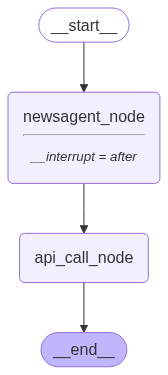

In [20]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        human_app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [21]:
config = {"configurable": {"thread_id": "1"}}
config2 = {"configurable": {"thread_id": "2"}}

In [22]:
human_app.invoke(
    {"question": "The weather will be 9°C in Munich"}, config=config2, subgraphs=True
)

State after update_article_state: {'article': 'The weather will be 9°C in Munich', 'off_or_ontopic': 'no', 'mentions_market_value': 'no', 'mentions_current_club': 'no', 'meets_100_words': 'no'}


{'question': 'The weather will be 9°C in Munich',
 'off_or_ontopic': 'no',
 'answer': 'Article not relevant for news agency'}

In [23]:
human_app.invoke(
    {"question": "Lionel Messi will to Real Madrid in 2025"},
    config=config,
    subgraphs=True,
)

State after update_article_state: {'article': 'Lionel Messi will to Real Madrid in 2025', 'off_or_ontopic': 'yes', 'mentions_market_value': 'no', 'mentions_current_club': 'no', 'meets_100_words': 'no'}
State after update_article_state: {'article': 'Lionel Messi will to Real Madrid in 2025 The market value of Lionel Messi is €50 million.', 'off_or_ontopic': 'yes', 'mentions_market_value': 'yes', 'mentions_current_club': 'no', 'meets_100_words': 'no'}
State after update_article_state: {'article': "Lionel Messi will to Real Madrid in 2025 The market value of Lionel Messi is €50 million. Lionel Messi's current club is Paris Saint-Germain.", 'off_or_ontopic': 'yes', 'mentions_market_value': 'yes', 'mentions_current_club': 'yes', 'meets_100_words': 'no'}
State after update_article_state: {'article': "Lionel Messi will to Real Madrid in 2025 The market value of Lionel Messi is €50 million. Lionel Messi's current club is Paris Saint-Germain. Lionel Messi, one of the most renowned footballers i

{'question': 'Lionel Messi will to Real Madrid in 2025',
 'off_or_ontopic': 'yes',
 'answer': "Lionel Messi, one of the most renowned footballers in the world, is anticipated to make a significant career move by joining Real Madrid in 2025. This transition has generated considerable excitement and speculation among fans and pundits alike, given the historical rivalry between Real Madrid and his current club, Paris Saint-Germain (PSG). As of now, Messi's market value stands at an impressive €50 million, indicative of his exceptional skill and status in the footballing world. Despite being in the latter stages of his illustrious career, Messi continues to showcase remarkable talent on the field, captivating audiences with his playmaking abilities and goal-scoring prowess. As he prepares for this potential move, the football community eagerly awaits the impact he will have on the team dynamics and performance at Real Madrid, as well as the reactions from fans and players alike."}

In [24]:
snapshot = human_app.get_state(config2)
snapshot.next

('api_call_node',)

In [25]:
human_app.invoke(None, config=config2)

{'question': 'The weather will be 9°C in Munich',
 'off_or_ontopic': 'no',
 'answer': 'Article not relevant for news agency',
 'api_response': 'API received answer: Article not relevant for news agency',
 'status_code': 200}

In [26]:
snapshot = human_app.get_state(config)
snapshot.next

('api_call_node',)

In [27]:
snapshot = human_app.get_state(config)
existing_message = snapshot.values
existing_message

{'question': 'Lionel Messi will to Real Madrid in 2025',
 'off_or_ontopic': 'yes',
 'answer': "Lionel Messi, one of the most renowned footballers in the world, is anticipated to make a significant career move by joining Real Madrid in 2025. This transition has generated considerable excitement and speculation among fans and pundits alike, given the historical rivalry between Real Madrid and his current club, Paris Saint-Germain (PSG). As of now, Messi's market value stands at an impressive €50 million, indicative of his exceptional skill and status in the footballing world. Despite being in the latter stages of his illustrious career, Messi continues to showcase remarkable talent on the field, captivating audiences with his playmaking abilities and goal-scoring prowess. As he prepares for this potential move, the football community eagerly awaits the impact he will have on the team dynamics and performance at Real Madrid, as well as the reactions from fans and players alike."}

In [28]:
human_app.update_state(
    config,
    {"answer": "Fake news!!!"},
)

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f058e94-60a7-6f42-8002-b0f0536b0fcb'}}

In [29]:
human_app.invoke(None, config=config)

{'question': 'Lionel Messi will to Real Madrid in 2025',
 'off_or_ontopic': 'yes',
 'answer': 'Fake news!!!',
 'api_response': 'API received answer: Fake news!!!',
 'status_code': 200}

In [30]:
snapshot = human_app.get_state(config)
snapshot.next

()